# Support_Vector_Machine

## On Credit_Risk Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
cr = pd.read_csv("CreditRisk.csv")

In [4]:
cr.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
cr.Gender = cr.Gender.fillna("Male")
cr.Married = cr.Married.fillna("No")
cr.Dependents = cr.Dependents.fillna(0)
cr.Self_Employed = cr.Self_Employed.fillna("No")
cr.LoanAmount = cr.LoanAmount.fillna(cr.LoanAmount.mean())
cr.Loan_Amount_Term = cr.Loan_Amount_Term.fillna(cr.Loan_Amount_Term.mean())
cr.Credit_History = cr.Credit_History.fillna(0)

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [7]:
cr.Gender = le.fit_transform(cr.Gender)
cr.Married = le.fit_transform(cr.Married)
cr.Education = le.fit_transform(cr.Education)
cr.Self_Employed = le.fit_transform(cr.Self_Employed)
cr.Property_Area = le.fit_transform(cr.Property_Area)

In [8]:
cr.Loan_Status = cr.Loan_Status.replace({ "Y" :1 , "N" :0 })

In [9]:
cr.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0.0,0,0,5849,0.0,142.51153,360.0,1.0,2,1
1,LP001003,1,1,1.0,0,0,4583,1508.0,128.00000,360.0,1.0,0,0
2,LP001005,1,1,0.0,0,1,3000,0.0,66.00000,360.0,1.0,2,1
3,LP001006,1,1,0.0,1,0,2583,2358.0,120.00000,360.0,1.0,2,1
4,LP001008,1,0,0.0,0,0,6000,0.0,141.00000,360.0,1.0,2,1


In [10]:
cr_x = cr.iloc[ : , 1:12]
cr_y = cr.iloc[ : , 12]

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
cr_x_train, cr_x_test, cr_y_train, cr_y_test = train_test_split(cr_x,cr_y, test_size = 0.2, random_state = 555)

In [13]:
# SVM ( Support Vector classifier)
from sklearn.svm import SVC
from sklearn.svm import LinearSVC, SVC


In [14]:
svc = SVC()

In [15]:
svc.fit(cr_x_train,cr_y_train)

SVC()

In [16]:
pred_svc = svc.predict(cr_x_test)
pred_svc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [17]:
from sklearn.metrics import confusion_matrix

tab_svc = confusion_matrix(pred_svc, cr_y_test)
tab_svc

array([[  0,   0],
       [ 61, 136]], dtype=int64)

In [18]:
# KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knn = KNeighborsClassifier(n_neighbors=7)

In [21]:
knn.fit(cr_x_train,cr_y_train)

KNeighborsClassifier(n_neighbors=7)

In [22]:
pred_knn = knn.predict(cr_x_test)

In [23]:
from sklearn.metrics import confusion_matrix

tab_knn = confusion_matrix(pred_knn, cr_y_test)
tab_knn

array([[ 11,  15],
       [ 50, 121]], dtype=int64)

In [24]:
cr_knn_acc = tab_knn.diagonal().sum() / tab_knn.sum()*100
cr_knn_acc

67.00507614213198

In [25]:
l1 =[]
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(cr_x_train,cr_y_train)
    pred_knn = knn.predict(cr_x_test)
    tab_knn = confusion_matrix(pred_knn, cr_y_test)
    cr_knn_acc = tab_knn.diagonal().sum() / tab_knn.sum()
    l1.append((cr_knn_acc))
    
    

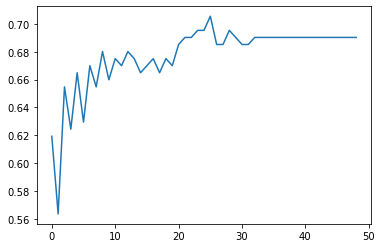

In [26]:
plt.plot(l1)

# On ctg data

In [27]:
ctg = pd.read_csv("CTG.csv")

In [28]:
ctg.NSP.value_counts()

1    1655
2     295
3     176
Name: NSP, dtype: int64

In [29]:
ctg_x = ctg.iloc[ : , [0,1,2] ]
ctg_y = ctg.iloc[ : , 3]

In [30]:
ctg_x_train, ctg_x_test, ctg_y_train, ctg_y_test = train_test_split(ctg_x,ctg_y, test_size = 0.2)

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(ctg_x_train,ctg_y_train)


KNeighborsClassifier(n_neighbors=7)

In [33]:
pred_knn = knn.predict(ctg_x_test)

In [34]:
from sklearn.metrics import confusion_matrix

tab_knn = confusion_matrix(pred_knn, ctg_y_test)
tab_knn

array([[299,  33,  19],
       [ 14,  26,   7],
       [ 15,   2,  11]], dtype=int64)

In [35]:
cr_acc = tab_knn.diagonal().sum() / tab_knn.sum() * 100
cr_acc

78.87323943661971

In [36]:
l1 =[]
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(ctg_x_train,ctg_y_train)
    pred_knn = knn.predict(ctg_x_test)
    tab_knn = confusion_matrix(pred_knn, ctg_y_test)
    ctg_knn_acc = tab_knn.diagonal().sum() / tab_knn.sum()
    l1.append((ctg_knn_acc))
    
    

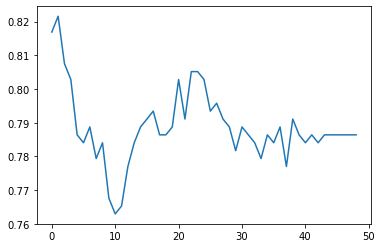

In [37]:
plt.plot(l1)